In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [192]:
df = pd.read_csv("Solar.csv",header=0).iloc[:,:5]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   R          32 non-null     int64  
 1   G          32 non-null     int64  
 2   B          32 non-null     int64  
 3   R_I        32 non-null     object 
 4   Thickness  32 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


In [193]:
df.R_I

0     1.947
1     1.946
2     1.949
3     1.948
4     1.965
5      1.96
6     1.966
7     1.965
8     1.969
9     1.969
10    1.968
11    1.966
12    1.942
13    1.941
14    1.944
15     1.94
16    1.977
17    1.978
18    1.979
19    1.977
20    1.987
21    1.988
22    1.987
23    1.992
24    1.974
25    1,973
26    1.975
27    1.972
28    1.966
29    1.959
30    1.962
31     1.96
Name: R_I, dtype: object

In [194]:
df.R_I = df.R_I.str.replace(",",".").astype(float)

In [195]:
df.R_I

0     1.947
1     1.946
2     1.949
3     1.948
4     1.965
5     1.960
6     1.966
7     1.965
8     1.969
9     1.969
10    1.968
11    1.966
12    1.942
13    1.941
14    1.944
15    1.940
16    1.977
17    1.978
18    1.979
19    1.977
20    1.987
21    1.988
22    1.987
23    1.992
24    1.974
25    1.973
26    1.975
27    1.972
28    1.966
29    1.959
30    1.962
31    1.960
Name: R_I, dtype: float64

In [196]:
seed = 10

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
train, test = train_test_split(df, test_size=0.3, random_state=seed)
X_train, y_train = train.iloc[:,:4], train.iloc[:,4]
X_test, y_test = test.iloc[:,:4], test.iloc[:,4]

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()


In [199]:
"""from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)"""

'from sklearn.preprocessing import MinMaxScaler\n\n# Create a MinMaxScaler object\nscaler = MinMaxScaler()\n\n# Fit the scaler to the data and transform it\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.transform(X_test)'

In [200]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.566859195282986

In [201]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch

In [202]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 10)
        self.fc2 = nn.Linear(10, 100)
        self.fc3 = nn.Linear(100, 250)
        self.fc4 = nn.Linear(250, 100)
        self.fc5 = nn.Linear(100, 10)
        self.fc6 = nn.Linear(10, 1)
        

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x= self.fc6(x)
        return x
    
net = Net()

criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train.values).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test.values).float()

for epoch in range(10000):  # loop over the dataset multiple times
    y_pred_train = net.forward(X_train)
    loss = criterion(y_pred_train, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
        
with torch.no_grad():
    y_pred = net.forward(X_test)
    y_pred = y_pred.numpy()
    print('Test loss: {}'.format(criterion(torch.from_numpy(y_pred), y_test).item()))

c:\Users\se99a\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([22])) that is different to the input size (torch.Size([22, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0: train loss: 8828.158203125
Epoch 100: train loss: 331.97674560546875
Epoch 200: train loss: 266.4754943847656
Epoch 300: train loss: 223.21376037597656
Epoch 400: train loss: 222.19285583496094
Epoch 500: train loss: 220.99041748046875
Epoch 600: train loss: 220.28065490722656
Epoch 700: train loss: 220.20797729492188
Epoch 800: train loss: 220.48406982421875
Epoch 900: train loss: 230.3198699951172
Epoch 1000: train loss: 220.0970916748047
Epoch 1100: train loss: 219.86570739746094
Epoch 1200: train loss: 224.86819458007812
Epoch 1300: train loss: 219.84803771972656
Epoch 1400: train loss: 220.01309204101562
Epoch 1500: train loss: 220.26132202148438
Epoch 1600: train loss: 219.95355224609375
Epoch 1700: train loss: 223.29254150390625
Epoch 1800: train loss: 220.854736328125
Epoch 1900: train loss: 220.19175720214844
Epoch 2000: train loss: 221.07879638671875
Epoch 2100: train loss: 219.4212646484375
Epoch 2200: train loss: 219.33067321777344
Epoch 2300: train loss: 219.39723

c:\Users\se99a\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


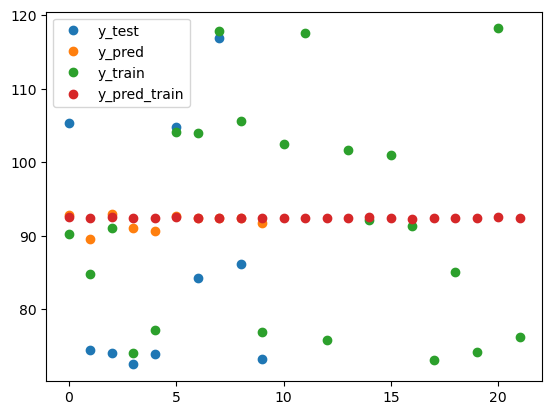

In [203]:
plt.plot(y_test, 'o')
plt.plot(y_pred, 'o')
plt.plot(y_train, 'o')
plt.plot(y_pred_train.detach().numpy(), 'o')
plt.legend(['y_test', 'y_pred', 'y_train', 'y_pred_train'])

In [204]:
%pip install tpot


     ---------------------------------------- 87.2/87.2 kB 5.1 MB/s eta 0:00:00
     -------------------------------------- 114.3/114.3 kB 6.9 MB/s eta 0:00:00
     --------------------------------------- 70.9/70.9 MB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=12019 sha256=b58b4619b00e074d334b189e78330e36f54334b56c7724afe470a144a497d86a
  Stored in directory: c:\users\se99a\appdata\local\pip\cache\wheels\ac\b6\fc\67f7dd6291ee9a509bb12bb9b80773eed4b88bd55292ac672f
Successfully built stopit


In [208]:
train, test = train_test_split(df, test_size=0.3, random_state=seed)
X_train, y_train = train.iloc[:,:4], train.iloc[:,4]
X_test, y_test = test.iloc[:,:4], test.iloc[:,4]

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [209]:
from tpot import TPOTRegressor

tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

# Evaluate the model on the test set
mse = tpot.score(X_test, y_test)
print('Test set mean squared error: %.3f' % mse)

# Export the best pipeline as Python code
tpot.export('tpot_best_pipeline.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -17.46157586805554

Generation 2 - Current best internal CV score: -17.380048999999993

Generation 3 - Current best internal CV score: -17.365694899234683

Generation 4 - Current best internal CV score: -17.365694899234683

Generation 5 - Current best internal CV score: -17.365694899234683

Best pipeline: AdaBoostRegressor(ExtraTreesRegressor(input_matrix, bootstrap=True, max_features=0.2, min_samples_leaf=12, min_samples_split=19, n_estimators=100), learning_rate=0.1, loss=linear, n_estimators=100)
Test set mean squared error: -129.241


c:\Users\se99a\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py:794: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(
